<a href="https://www.kaggle.com/fanbyprinciple/brain-tumour-mri-data-using-svms?scriptVersionId=85716955" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# accompanying notebook from https://www.youtube.com/watch?v=5lgrlddp-98

# Importing modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Preparing / collecting data

Lets just choose between two classes, no_tumour and pituatory_tumour.

In [3]:
import os
path = os.listdir('../input/brain-tumor-classification-mri/Training')
classes = {'no_tumor': 0, 'pituitary_tumor':1}

In [4]:
import cv2
X = []
Y = []
for cls in classes:
    pth = '../input/brain-tumor-classification-mri/Training/' + cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

np.unique(Y)

array([0, 1])

In [5]:
X = np.array(X)
Y = np.array(Y)

In [6]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [7]:
X.shape

(1222, 200, 200)

## Visualising data

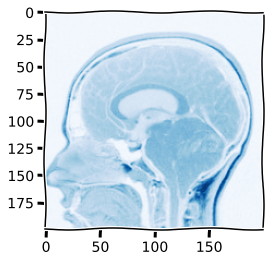

In [8]:
with plt.xkcd():
    plt.imshow(X[0], cmap='Blues')

## Prepare data

In [9]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

## Split data

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10, test_size=0.20)

In [11]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

## Feature scaling

In [12]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


## Feature selection PCA

PCA is necesseray to do befre we use support vector machines in order to select the most important attributes.

In [13]:
from sklearn.decomposition import PCA

In [14]:
print(xtrain.shape, xtest.shape)
pca = PCA(.98)
pca_train = pca.fit_transform(xtrain)
pca_test = pca.transform(xtest)

(977, 40000) (245, 40000)


## Train model

In [15]:
pca_test.shape, pca_train.shape

((245, 624), (977, 624))

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [17]:
lg = LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)

LogisticRegression(C=0.1)

In [18]:
sv = SVC()
sv.fit(pca_train, ytrain)

SVC()

In [19]:
pca_train.shape

(977, 624)

## Evaluation

In [20]:
print("training score: ", lg.score(pca_train, ytrain))
print("testing score: ", lg.score(pca_test, ytest))

training score:  1.0
testing score:  0.9714285714285714


In [21]:
print("training score: ", sv.score(pca_train, ytrain))
print("testing score: ", sv.score(pca_test, ytest))

training score:  0.9959058341862845
testing score:  0.963265306122449


## Prediction

In [22]:
pca_test.shape

(245, 624)

In [23]:
pred = sv.predict(pca_test)
np.where(ytest != pred)

(array([  3,  33,  57,  60, 138, 159, 172, 220, 225]),)

In [24]:
pred[6]

0

In [25]:
ytest[6]

0

## Test model

In [26]:
dec = {0: 'No tumour', 1: 'pituitory tumour'}


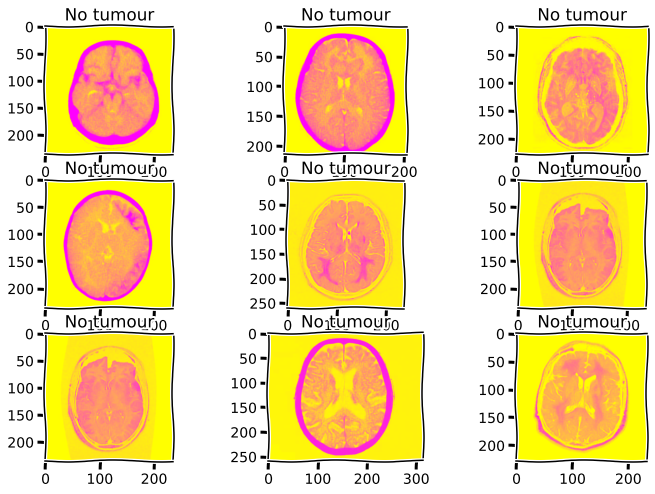

In [27]:
plt.figure(figsize=(12,8))
p = os.listdir('../input/brain-tumor-classification-mri/Testing')
c=1
with plt.xkcd():

    for i in os.listdir('../input/brain-tumor-classification-mri/Testing/no_tumor')[:9]:
        plt.subplot(3,3,c)

        img = cv2.imread('../input/brain-tumor-classification-mri/Testing/no_tumor/' + i, 0)
        img1 = cv2.resize(img, (200,200))
        img1 = img1.reshape(1,-1)/255
        pca_test = pca.transform(img1)
        p = sv.predict(pca_test)
        plt.title(dec[p[0]])
        plt.imshow(img, cmap='spring_r')
        c+=1

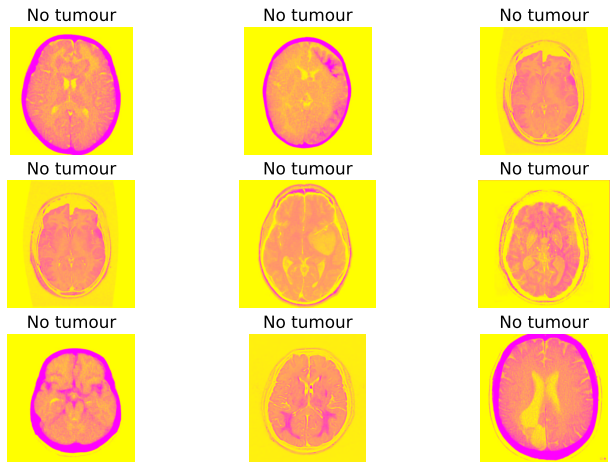

In [28]:
plt.figure(figsize=(12,8))
p = os.listdir('../input/brain-tumor-classification-mri/Testing')
c=1
with plt.xkcd():

    for i in os.listdir('../input/brain-tumor-classification-mri/Testing/pituitary_tumor')[:9]:
        plt.subplot(3,3,c)

        img = cv2.imread('../input/brain-tumor-classification-mri/Testing/no_tumor/' + i, 0)
#         print(img.shape)
        img1 = cv2.resize(img, (200,200))
#         print(img1.shape)
        img1 = (img1.reshape(1,-1))/255
        pca_test = pca.transform(img1)
#         print(pca_test.shape)
        p = sv.predict(pca_test)
        plt.title(dec[p[0]])
        plt.imshow(img, cmap='spring_r')
        plt.axis('off')
        c+=1